# **Importing the libraries**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




```
# This is formatted as code
```

# **Part 1 - Data Preprocessing**

**Preprocessing the Training set and define validation set**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, validation_split=0.2)



training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Education/csDegree/thirdYear/firstSemester/DLcourse/middletaskcomputervision/dataset/dataset/training_set',
                                                 target_size = (32, 32),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')

validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Education/csDegree/thirdYear/firstSemester/DLcourse/middletaskcomputervision/dataset/dataset/training_set',
                                                 target_size = (32, 32),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 12040 images belonging to 3 classes.
Found 3010 images belonging to 3 classes.


**Preprocessing the Test set**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Education/csDegree/thirdYear/firstSemester/DLcourse/middletaskcomputervision/dataset/dataset/test_set',
                                            target_size = (32, 32),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3010 images belonging to 3 classes.


# **Part 2 - Building the CNN**

**Initialising the CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

**Building the layers**

In [ ]:
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(3, activation='softmax'))

**review the architecture**

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# **Part 3 - Training the CNN**

**Compiling the CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [ ]:
history = cnn.fit(x = training_set,validation_data=validation_set , epochs = 25)

Epoch 1/25
377/377 [==============================] - 1636s 4s/step - loss: 0.6940 - accuracy: 0.6936 - val_loss: 0.5706 - val_accuracy: 0.7545
Epoch 2/25
377/377 [==============================] - 47s 124ms/step - loss: 0.5695 - accuracy: 0.7610 - val_loss: 0.5185 - val_accuracy: 0.7860
Epoch 3/25
377/377 [==============================] - 47s 124ms/step - loss: 0.5131 - accuracy: 0.7895 - val_loss: 0.4848 - val_accuracy: 0.7967
Epoch 4/25
377/377 [==============================] - 47s 125ms/step - loss: 0.4719 - accuracy: 0.8082 - val_loss: 0.5236 - val_accuracy: 0.7860
Epoch 5/25
377/377 [==============================] - 47s 124ms/step - loss: 0.4436 - accuracy: 0.8201 - val_loss: 0.4337 - val_accuracy: 0.8236
Epoch 6/25
377/377 [==============================] - 46s 123ms/step - loss: 0.4310 - accuracy: 0.8257 - val_loss: 0.4054 - val_accuracy: 0.8352
Epoch 7/25
377/377 [==============================] - 47s 124ms/step - loss: 0.4178 - accuracy: 0.8336 - val_loss: 0.3974 - val_acc

# **Part 4 - Analizing the result of the training proccess**

**Visualization of the Loss and Accuracy**

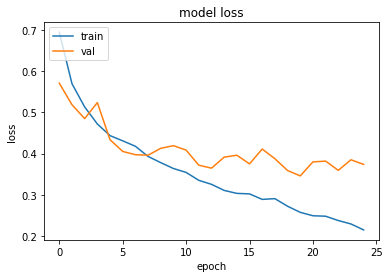

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

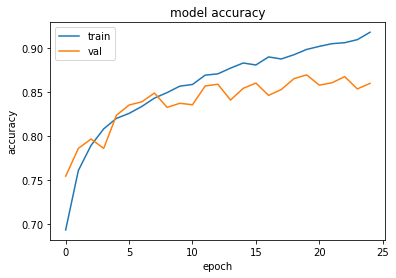

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Part 5 - Evaluating the model on test set**

In [ ]:
score = cnn.evaluate(test_set)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

95/95 [==============================] - 536s 6s/step - loss: 0.3310 - accuracy: 0.8791
Test loss: 0.33104947209358215 / Test accuracy: 0.8790697455406189
